In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
match_data = pd.read_csv('matches.csv')
ball_data = pd.read_csv('deliveries.csv')

In [3]:
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ball_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match_data.shape

(756, 18)

In [6]:
ball_data.shape

(179078, 21)

In [7]:
match_data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
ball_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [9]:
match_data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
ball_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
print('Matches played so far:', match_data.shape[0])
print('\nCities played at:', match_data.city.unique())
print('\n Teams participated', match_data.team1.unique())

Matches played so far: 756

Cities played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

 Teams participated ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


# Extracting Year from Date column

In [12]:
match_data['season'] = pd.DatetimeIndex(match_data.date).year
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017


In [13]:
matches_per_season = match_data.groupby('season').id.count().reset_index().rename(columns= {'id':'matches'})
matches_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

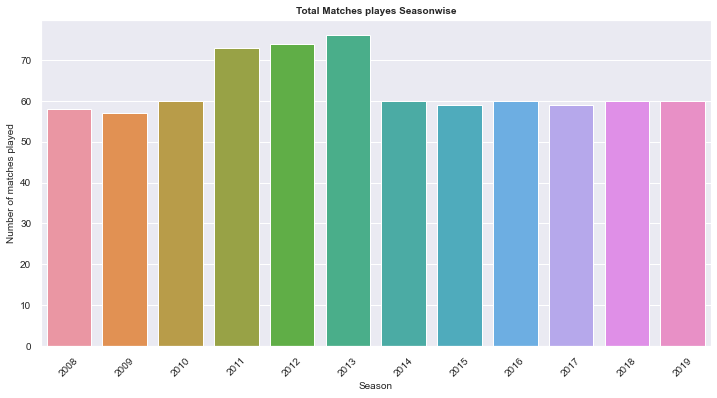

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(match_data.season)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize = 10)
plt.title("Total Matches playes Seasonwise", fontsize=10, fontweight='bold')
plt.xlabel('Season', fontsize=10)
plt.ylabel('Number of matches played', fontsize=10)
plt.show

In [15]:
match_data.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017


In [16]:
ball_data.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [17]:
ball_data = ball_data.rename(columns={'match_id':'id'})
ball_data.head(1)

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [18]:
season_data = match_data[['season', 'id']].merge(ball_data, on ='id', how='left').drop('id',axis=1)
season_data.head(2)

,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [19]:
runs_seasonwise = season_data.groupby('season')['total_runs'].sum().reset_index()
runs_seasonwise

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


<AxesSubplot:xlabel='season', ylabel='total_runs'>

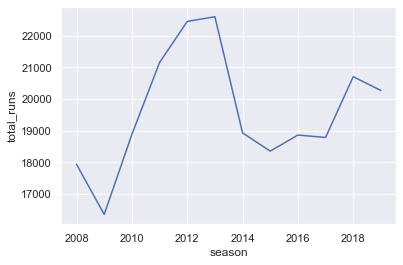

In [20]:
sns.lineplot(data=runs_seasonwise, x='season', y='total_runs')

In [21]:
import seaborn as sns
sns.set()

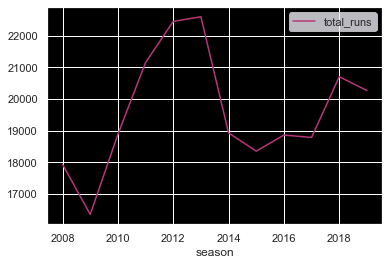

In [22]:
runs_seasonwise = season_data.groupby('season')['total_runs'].sum().reset_index()
p=runs_seasonwise.set_index('season')
ax = plt.axes()
ax.set(facecolor='black')
sns.lineplot(data=p, palette='magma')
plt.show()

<AxesSubplot:xlabel='season'>

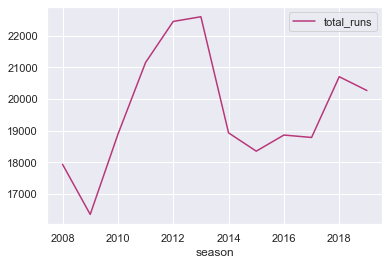

In [23]:
p=runs_seasonwise.set_index('season')
sns.set_style('darkgrid')
sns.lineplot(data=p, palette='magma')


## Runs scored per match in each season

In [24]:
season_data.head(2)

,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [25]:
runs_seasonwise.head(1)

,season,total_runs
0,2008,17937


In [26]:
matches_per_season.head(1)

,season,matches
0,2008,58


In [27]:
total_matches_runs = matches_per_season.merge(runs_seasonwise, on='season', how='left')
total_matches_runs

,season,matches,total_runs
0,2008,58,17937
1,2009,57,16353
2,2010,60,18883
3,2011,73,21154
4,2012,74,22453
5,2013,76,22602
6,2014,60,18931
7,2015,59,18353
8,2016,60,18862
9,2017,59,18786


In [30]:
total_matches_runs['avg_runs_per_match'] = total_matches_runs.total_runs / total_matches_runs.matches
total_matches_runs

,season,matches,total_runs,avg_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


## Toss won by each team

In [32]:
toss = match_data.toss_winner.value_counts()
toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<AxesSubplot:ylabel='toss_winner'>

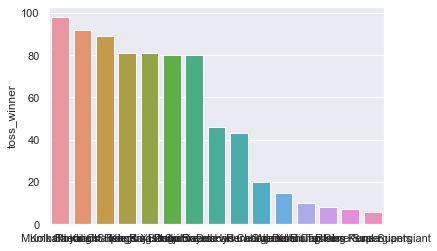

In [33]:
sns.barplot(x=toss.index, y=toss)

<AxesSubplot:title={'center':'Toss Winners'}, xlabel='Teams', ylabel='toss_winner'>

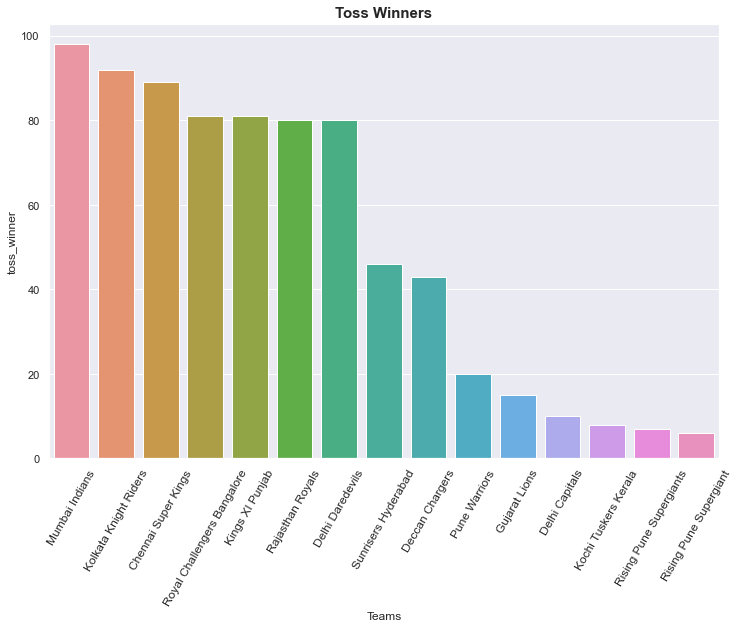

<AxesSubplot:title={'center':'Toss Winners'}, xlabel='Teams', ylabel='toss_winner'>

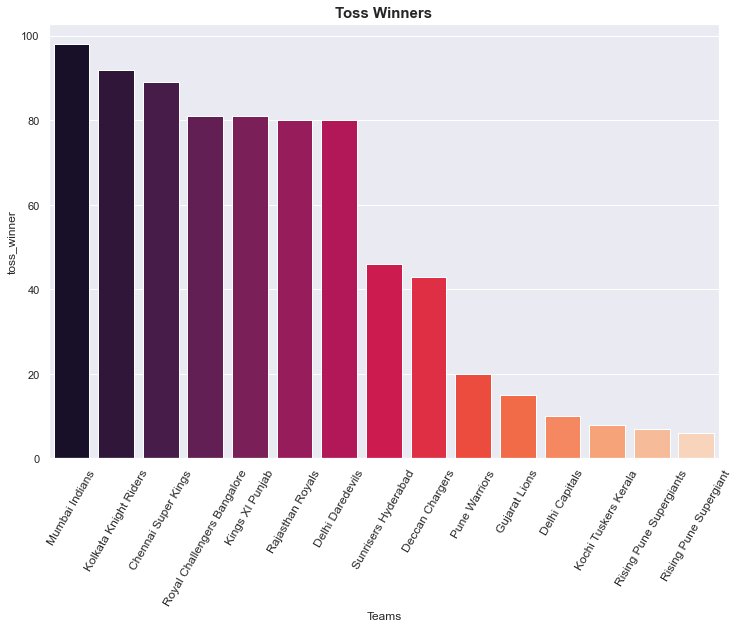

In [50]:
plt.figure(figsize=(12,8))
plt.title("Toss Winners", fontsize=15, fontweight='bold')
plt.xlabel('Teams')
plt.ylabel('Number of time Toss won')
plt.xticks(rotation=60, fontsize=12)
sns.barplot(x=toss.index, y=toss, palette='rocket', saturation=1)

<AxesSubplot:title={'center':'Toss Winners'}, xlabel='toss_winner', ylabel='Number of time Toss won'>

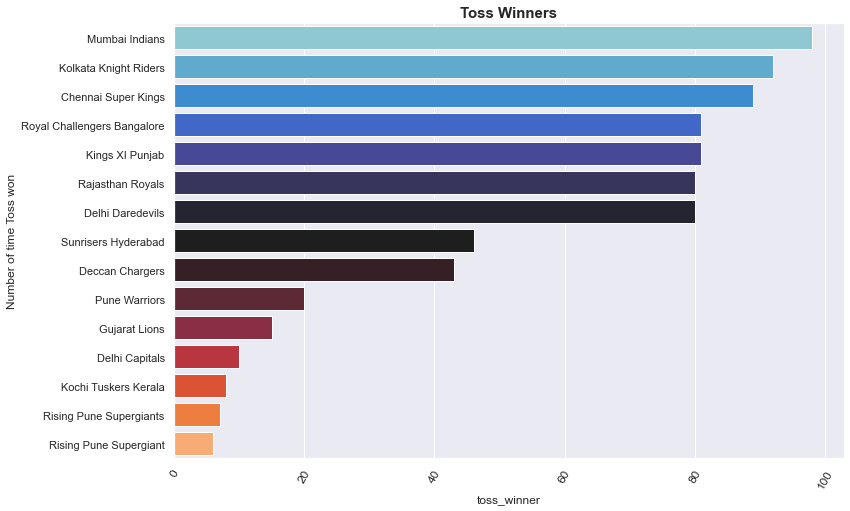

In [49]:
plt.figure(figsize=(12,8))
plt.title("Toss Winners", fontsize=15, fontweight='bold')
plt.xlabel('Teams')
plt.ylabel('Number of time Toss won')
plt.xticks(rotation=60, fontsize=12)
sns.barplot(y=toss.index, x=toss, orient ='h',palette='icefire', saturation=1)

# Toss decisions

<AxesSubplot:xlabel='season', ylabel='count'>

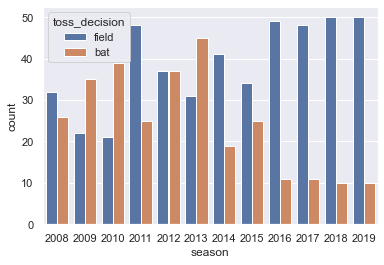

In [51]:
sns.countplot(data = match_data,x='season', hue = 'toss_decision')

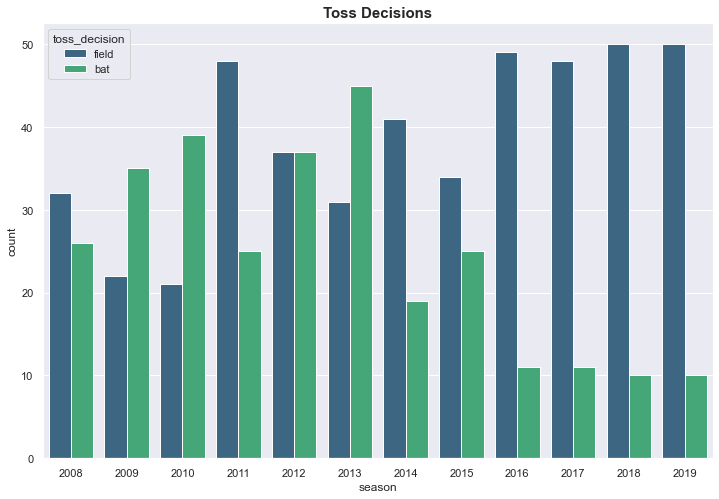

In [61]:
plt.figure(figsize=(12,8))
plt.xlabel('Season')
plt.ylabel('Number of times toss won')
plt.title('Toss Decisions', fontsize =15, fontweight='bold')
sns.countplot(data = match_data,x='season', hue = 'toss_decision', palette = 'viridis')
plt.show()

In [73]:
trial = match_data[['win_by_runs', 'win_by_wickets','season']]
trial.head()

,win_by_runs,win_by_wickets,season
0,35,0,2017
1,0,7,2017
2,0,10,2017
3,0,6,2017
4,15,0,2017


In [71]:
match_data.result.dtypes

dtype('O')